# 1 cqr without pinnball loss (np.quantile)

Lower Bounds: [-0.12679865 -0.02596023  0.0738502   0.17161515  0.26633796]
Upper Bounds: [0.12679865 0.22763707 0.32744751 0.42521246 0.51993526]
True Outputs: [0.         0.10083842 0.20064886 0.2984138  0.39313661]


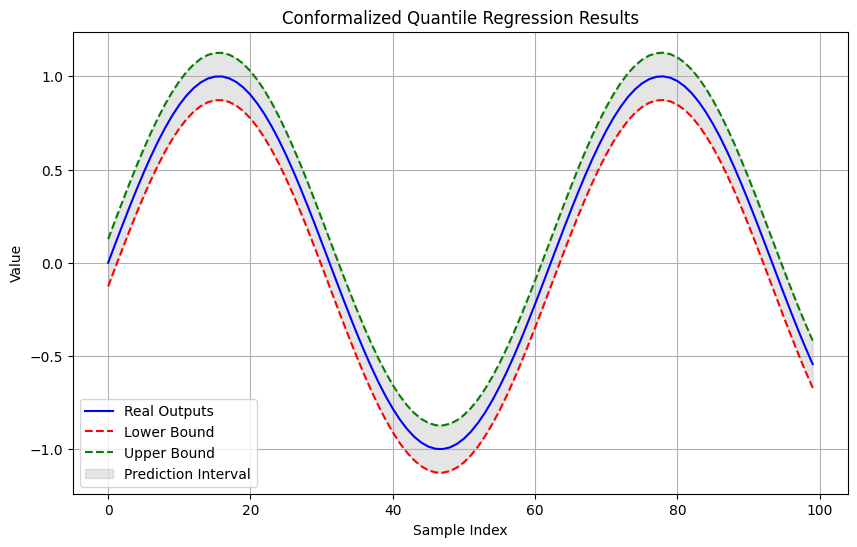

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def conformal_quantile_regression(real_inputs, real_outputs, real_errors, alpha):
    """
    Perform Conformalized Quantile Regression (CQR) using real model data.

    Args:
        real_inputs: Numpy array of input features (not used directly in CQR).
        real_outputs: Numpy array of true outputs.
        real_errors: Numpy array of errors from the model.
        alpha: Miscoverage rate (e.g., 0.1 for 90% coverage).

    Returns:
        lower_bound: Numpy array of lower bound predictions.
        upper_bound: Numpy array of upper bound predictions.
    """
    # Calculate the quantile of residuals (errors)
    quantile = np.quantile(real_errors, 1 - alpha)

    # Compute prediction intervals
    lower_bound = real_outputs - quantile
    upper_bound = real_outputs + quantile

    return lower_bound, upper_bound

def plot_results(real_outputs, lower_bound, upper_bound):
    """
    Plot the real outputs along with the lower and upper bounds.

    Args:
        real_outputs: Numpy array of true outputs.
        lower_bound: Numpy array of lower bound predictions.
        upper_bound: Numpy array of upper bound predictions.
    """
    x = np.arange(len(real_outputs))
    plt.figure(figsize=(10, 6))
    plt.plot(x, real_outputs, label="Real Outputs", color="blue")
    plt.plot(x, lower_bound, label="Lower Bound", color="red", linestyle="--")
    plt.plot(x, upper_bound, label="Upper Bound", color="green", linestyle="--")
    plt.fill_between(x, lower_bound, upper_bound, color="gray", alpha=0.2, label="Prediction Interval")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.title("Conformalized Quantile Regression Results")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Assume these are your real model's outputs and errors
    np.random.seed(42)
    num_samples = 100

    # Example data
    real_inputs = np.random.rand(num_samples, 3)  # Input features (not used in this example)
    real_outputs = np.sin(np.linspace(0, 10, num_samples))  # True outputs
    real_errors = np.random.normal(0, 0.1, num_samples)  # Errors from the model

    # Perform CQR
    alpha = 0.1  # 90% prediction interval
    lower_bound, upper_bound = conformal_quantile_regression(real_inputs, real_outputs, real_errors, alpha)

    # Display results
    print("Lower Bounds:", lower_bound[:5])
    print("Upper Bounds:", upper_bound[:5])
    print("True Outputs:", real_outputs[:5])

    # Plot results
    plot_results(real_outputs, lower_bound, upper_bound)


# 2 cqr from chatgpt

Epoch 1/100, Loss: 1.9413
Epoch 2/100, Loss: 1.4410
Epoch 3/100, Loss: 1.4942
Epoch 4/100, Loss: 1.1583
Epoch 5/100, Loss: 0.8925
Epoch 6/100, Loss: 1.0549
Epoch 7/100, Loss: 0.8474
Epoch 8/100, Loss: 0.9298
Epoch 9/100, Loss: 0.9778
Epoch 10/100, Loss: 0.8882
Epoch 11/100, Loss: 0.8407
Epoch 12/100, Loss: 0.8987
Epoch 13/100, Loss: 0.7984
Epoch 14/100, Loss: 0.8912
Epoch 15/100, Loss: 0.8583
Epoch 16/100, Loss: 0.8223
Epoch 17/100, Loss: 0.8848
Epoch 18/100, Loss: 0.8427
Epoch 19/100, Loss: 0.8600
Epoch 20/100, Loss: 0.9052
Epoch 21/100, Loss: 0.7975
Epoch 22/100, Loss: 0.8140
Epoch 23/100, Loss: 0.8062
Epoch 24/100, Loss: 0.8561
Epoch 25/100, Loss: 0.8343
Epoch 26/100, Loss: 0.8854
Epoch 27/100, Loss: 0.8475
Epoch 28/100, Loss: 0.9013
Epoch 29/100, Loss: 0.8984
Epoch 30/100, Loss: 0.9125
Epoch 31/100, Loss: 0.8702
Epoch 32/100, Loss: 0.9091
Epoch 33/100, Loss: 0.8976
Epoch 34/100, Loss: 0.9336
Epoch 35/100, Loss: 0.9998
Epoch 36/100, Loss: 0.9330
Epoch 37/100, Loss: 0.8440
Epoch 38/1

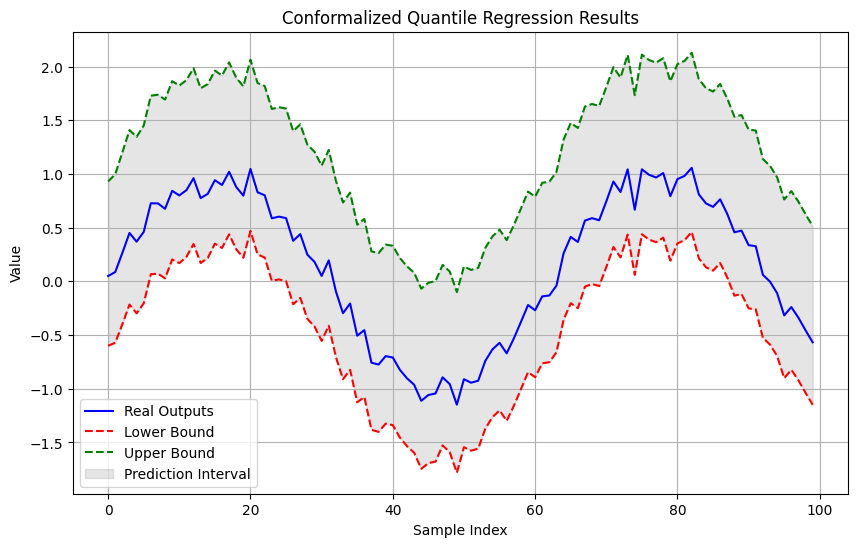

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def pinball_loss(predictions, targets, quantile):
    """
    Compute the pinball loss for a given quantile.

    Args:
        predictions: Predicted values (torch.Tensor).
        targets: True values (torch.Tensor).
        quantile: Quantile value (float, e.g., 0.1 for 10%).

    Returns:
        Pinball loss (torch.Tensor).
    """
    diff = targets - predictions
    loss = torch.maximum(quantile * diff, (quantile - 1) * diff)
    return loss.mean()

def train_cqr_model(dataset, model, optimizer, quantiles, epochs):
    """
    Train the model for upper and lower quantile regression using pinball loss.

    Args:
        dataset: Torch Dataset containing inputs and outputs.
        model: PyTorch model.
        optimizer: Optimizer for training.
        quantiles: List of quantiles to train on (e.g., [0.1, 0.9]).
        epochs: Number of training epochs.

    Returns:
        Trained model.
    """
    loader = DataLoader(dataset, batch_size=32, shuffle=True)
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = 0
            for i, q in enumerate(quantiles):
                loss += pinball_loss(outputs[:, i], targets, q)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")
    return model

def plot_results(real_outputs, lower_bound, upper_bound):
    """
    Plot the real outputs along with the lower and upper bounds.

    Args:
        real_outputs: Numpy array of true outputs.
        lower_bound: Numpy array of lower bound predictions.
        upper_bound: Numpy array of upper bound predictions.
    """
    x = np.arange(len(real_outputs))
    plt.figure(figsize=(10, 6))
    plt.plot(x, real_outputs, label="Real Outputs", color="blue")
    plt.plot(x, lower_bound, label="Lower Bound", color="red", linestyle="--")
    plt.plot(x, upper_bound, label="Upper Bound", color="green", linestyle="--")
    plt.fill_between(x, lower_bound, upper_bound, color="gray", alpha=0.2, label="Prediction Interval")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.title("Conformalized Quantile Regression Results")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    torch.manual_seed(42)
    num_samples = 100

    inputs = np.linspace(0, 10, num_samples).reshape(-1, 1)
    outputs = np.sin(inputs) + 0.1 * np.random.normal(size=inputs.shape)

    # Convert to PyTorch tensors
    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
    outputs_tensor = torch.tensor(outputs, dtype=torch.float32)

    # Create dataset
    dataset = TensorDataset(inputs_tensor, outputs_tensor)

    # Define model
    class QuantileModel(nn.Module):
        def __init__(self, input_dim, quantiles):
            super(QuantileModel, self).__init__()
            self.quantiles = quantiles
            self.network = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.Tanh(),
                nn.Linear(64, len(quantiles))
            )

        def forward(self, x):
            return self.network(x)

    quantiles = [0.1, 0.9]
    model = QuantileModel(input_dim=1, quantiles=quantiles)

    # Define optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Train model
    epochs = 100
    model = train_cqr_model(dataset, model, optimizer, quantiles, epochs)

    # Evaluate model
    model.eval()
    with torch.no_grad():
        predictions = model(inputs_tensor).numpy()
        lower_bound = predictions[:, 0]
        upper_bound = predictions[:, 1]

    # Plot results
    plot_results(outputs.flatten(), outputs.flatten() + lower_bound, outputs.flatten() + upper_bound)


# 3 pinnball loss visual

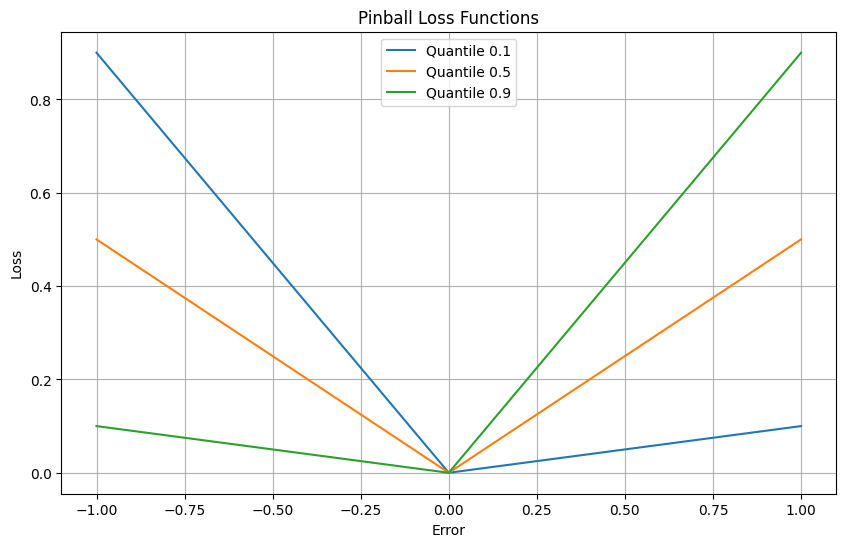

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def pinnball(error, quantile):
    return np.maximum(quantile * error, (quantile - 1) * error)

quantiles = [0.1, 0.5, 0.9]

error =np.linspace(-1, 1, 1000)

# compute pinball loss for each quantile
losses = np.array([pinnball(error, q) for q in quantiles])

# plot the loss functions
plt.figure(figsize=(10, 6))
for i, q in enumerate(quantiles):
    plt.plot(error, losses[i], label=f"Quantile {q}")
plt.xlabel("Error")
plt.ylabel("Loss")
plt.title("Pinball Loss Functions")
plt.legend()
plt.grid()
plt.show()


# cqr done by me

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch

np.random.seed(0)

In [5]:
def plot_true_and_error(x, y, error):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="True Function", color="blue")
    plt.scatter(x, error, label="Error", color="red", alpha=0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("True Function and Error")
    plt.legend()
    plt.grid()
    plt.show()

# Define model
class QuantileModel(torch.nn.Module):
    def __init__(self, input_dim, quantiles):
        super(QuantileModel, self).__init__()
        self.quantiles = quantiles
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.Tanh(),
            nn.Linear(64, len(quantiles))
        )

    def forward(self, x):
        return self.network(x)

def data_splitter(x, y, error, train_ratio, calibration_ratio, test_ratio):

    # split x, y and error into train, calibration and test sets using sklearn
    x_train, x_temp, y_train, y_temp, error_train, error_temp = train_test_split(x, y, error, test_size=1 - train_ratio, random_state=0)
    x_cal, x_test, y_cal, y_test, error_cal, error_test = train_test_split(x_temp, y_temp, error_temp, test_size=test_ratio/(test_ratio + calibration_ratio), random_state=0)

    return x_train, x_cal, x_test, y_train, y_cal, y_test, error_train, error_cal, error_test


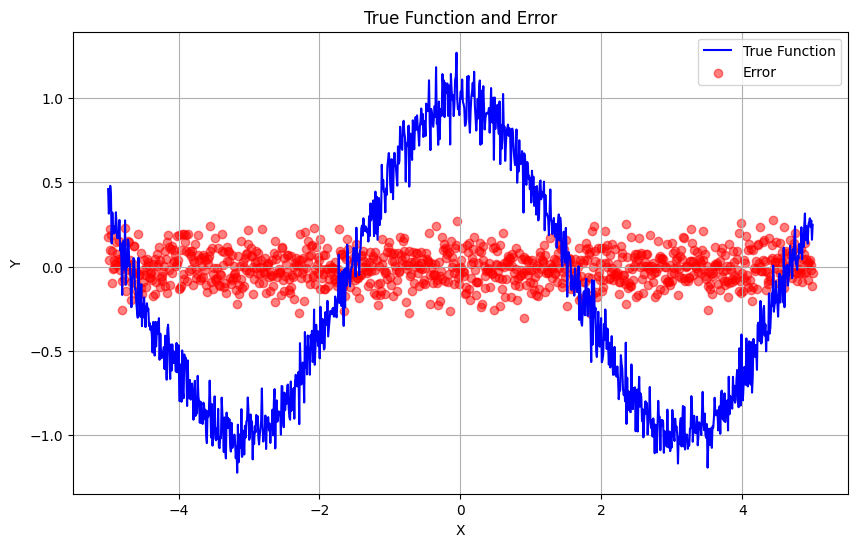

In [6]:
# number of samples
num_samples = 1000

# data generation
x = np.linspace(-5, 5, num_samples)
error = np.random.normal(0, 0.1, num_samples)
y = np.cos(x) + error

# plot the true function and the error
plot_true_and_error(x, y, error)

# split train, calibration and test data using sklearn
train_ratio = 0.6
test_ratio = 0.2
calibration_ratio = 0.2

x_train, x_cal, x_test, y_train, y_cal, y_test, error_train, error_cal, error_test = data_splitter(x, y, error, train_ratio, calibration_ratio, test_ratio)

# quantiles to predict
q = 0.95



# the reshape fiasco

In [3]:
import numpy as np

arr = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

def reshape(array, shape):

    # rows and columns
    rows, cols = shape

    return array.reshape(cols, rows).T

print(reshape(arr, shape = (2, 3)))

[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]


# quantile calculation

In [9]:
arr = np.random.rand(10)

print(arr)

[0.04612841 0.2561351  0.70460881 0.59278722 0.35942876 0.03012115
 0.6451119  0.52921587 0.84627749 0.07170114]


In [10]:
print(np.quantile(arr, 0.9))

0.718775678466298


In [ ]:
print(np.quantile(np.sort(arr), 0.9))

0.718775678466298
